In [16]:
import pandas as pd
import os
DATA_DIR = 'data'


In [6]:

movies_df = pd.read_csv('C:\\Users\\PC-Service\\Desktop\\projet_synthese\\CINEIA\\recommender_system\\data\\database_data\\movies.csv')
genres_df = pd.read_csv('C:\\Users\\PC-Service\\Desktop\\projet_synthese\\CINEIA\\recommender_system\\data\\database_data\\genres.csv')
keywords_df = pd.read_csv('C:\\Users\\PC-Service\\Desktop\\projet_synthese\\CINEIA\\recommender_system\\data\\database_data\\keywords.csv')
movies_genre_df = pd.read_csv('C:\\Users\\PC-Service\\Desktop\\projet_synthese\\CINEIA\\recommender_system\\data\\database_data\\movies_genre.csv')
movies_keyword_df = pd.read_csv('C:\\Users\\PC-Service\\Desktop\\projet_synthese\\CINEIA\\recommender_system\\data\\database_data\\movies_keyword.csv')


In [7]:
C= movies_df['vote_average'].mean()
C

5.6191969306079255

In [8]:
m= movies_df['vote_count'].quantile(0.9)
m

160.0

filter out the movies that qualify for the chart

In [9]:
q_movies = movies_df.copy().loc[movies_df['vote_count'] >= m]
q_movies.shape

(4548, 13)

calculate our metric for each qualified movie. To do this, we will define a function, weighted_rating() and define a new feature score, of which we'll calculate the value by applying this function to our DataFrame of qualified movies:

In [10]:


def weighted_rating(x, m, C):
    """
    Calculates the weighted rating for a movie using the IMDB formula.

    Args:
        x (pd.Series): A row of the movies DataFrame.
        m (int): Minimum votes required to be listed.
        C (float): Mean vote across the whole report.

    Returns:
        float: The weighted rating.
    """
    v = x['vote_count']
    R = x['vote_average']
    return (v / (v + m) * R) + (m / (m + v) * C)

In [11]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(lambda x: weighted_rating(x, m, C), axis=1)

sort the DataFrame based on the score feature and output the title, vote count, vote average and weighted rating or score of the top 10 movies

In [12]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
321,The Shawshank Redemption,8358,8.5,8.445888
855,The Godfather,6024,8.5,8.425464
10332,Dilwale Dulhania Le Jayenge,661,9.1,8.421646
12499,The Dark Knight,12269,8.3,8.265490
2879,Fight Club,9678,8.3,8.256401
300,Pulp Fiction,8670,8.3,8.251424
536,Schindler's List,4436,8.3,8.206674
23675,Whiplash,4376,8.3,8.205439
5525,千と千尋の神隠し,3968,8.3,8.196093
2248,La vita è bella,3643,8.3,8.187213


Under the Trending Now tab of these systems we find movies that are very popular and they can just be obtained by sorting the dataset by the popularity column.

Text(0.5, 1.0, 'Popular Movies')

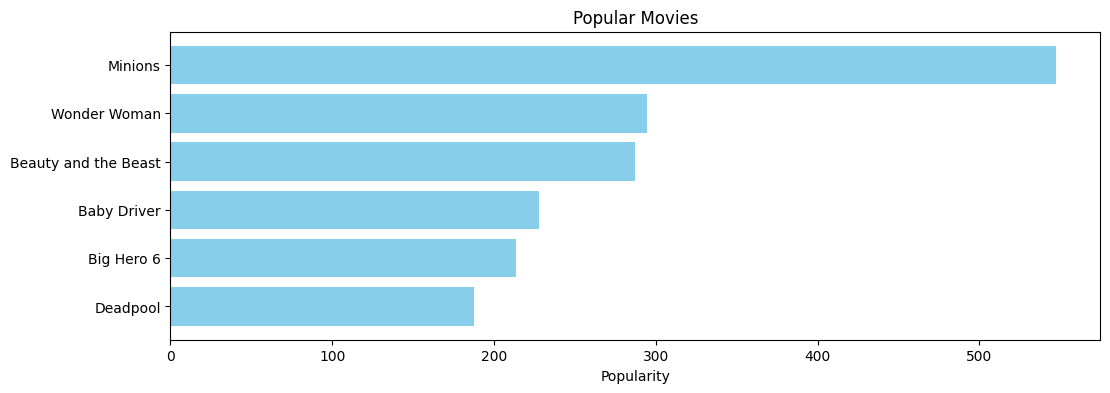

In [13]:
pop= movies_df.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

In [34]:
def load_trending_movies_from_csv(filename='recommender_system\\data\\database_data\\trending_movies.csv'):
    """
    Loads the trending movies DataFrame from a CSV file.

    Args:
        filename (str): The name of the CSV file to load.

    Returns:
        pd.DataFrame: The DataFrame containing trending movies, or None if an error occurs.
    """
    try:
        trending_movies = pd.read_csv(filename)
        return trending_movies
    except FileNotFoundError:
        print(f"File not found: {filename}")
        return None
    except Exception as e:
        print(f"Error loading trending movies from {filename}: {e}")
        return None
    
def save_trending_movies_to_csv(f_movie, filename='C:\\Users\\PC-Service\\Desktop\\projet_synthese\\CINEIA\\recommender_system\\data\\database_data\\trending_movies.csv'):
    """
    Saves the trending movies DataFrame to a CSV file.

    Args:
        f_movie (pd.DataFrame): The DataFrame containing trending movies.
        filename (str): The name of the CSV file to save.
    """
    try:
        f_movie.to_csv(filename, index=False)
        print(f"Trending movies saved to {filename}")
    except Exception as e:
        print(f"Error saving trending movies to {filename}: {e}")    

In [35]:
save_trending_movies_to_csv(q_movies)


Trending movies saved to C:\Users\PC-Service\Desktop\projet_synthese\CINEIA\recommender_system\data\database_data\trending_movies.csv
